[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mukit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



✅ ANALYSIS RESULTS
📊 Correlation between Sentiment and Return: 0.1581
📉 P-value: 2.2350e-01 (Significant if < 0.05)


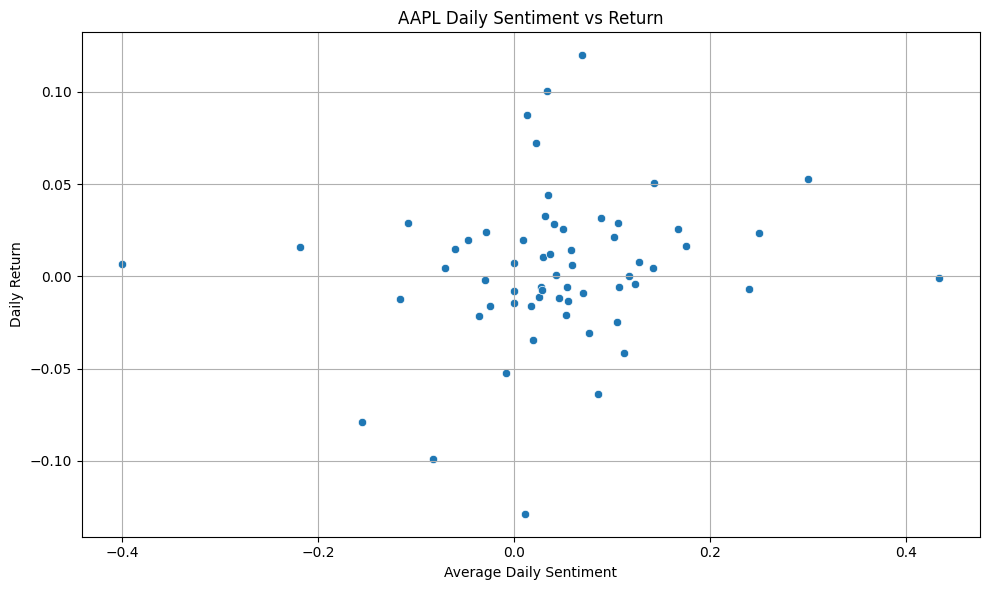

In [7]:
import os
import pandas as pd
from textblob import TextBlob
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import nltk

# Ensure required corpora for nltk are downloaded
nltk.download('punkt')

# ------------------------------
# 1. Load Stock Price Data
# ------------------------------
def load_stock_data(filepath):
    df = pd.read_csv(filepath)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df[['Date', 'Adj Close']].rename(columns={'Adj Close': 'Close'})
    df.dropna(subset=['Date', 'Close'], inplace=True)
    df.set_index('Date', inplace=True)
    df['Return'] = df['Close'].pct_change()
    return df.dropna()

# ------------------------------
# 2. Parse Date Safely from News
# ------------------------------
def parse_date_safe(date_str):
    try:
        return parser.parse(str(date_str)).date()
    except Exception:
        return pd.NaT

# ------------------------------
# 3. Load & Filter News Headlines
# ------------------------------
def load_news_data(folder_path, target_stock):
    all_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    news_df_list = []

    for file in all_files:
        full_path = os.path.join(folder_path, file)
        try:
            df = pd.read_csv(full_path)
        except Exception as e:
            print(f"Error reading {file}: {e}")
            continue

        required_cols = {'headline', 'date', 'stock'}
        if not required_cols.issubset(df.columns):
            continue

        df = df[df['stock'].str.upper() == target_stock.upper()]
        df['date'] = df['date'].apply(parse_date_safe)
        df = df[['date', 'headline']].dropna()
        news_df_list.append(df)

    if news_df_list:
        return pd.concat(news_df_list, ignore_index=True)
    else:
        return pd.DataFrame(columns=['date', 'headline'])

# ------------------------------
# 4. Sentiment Analysis
# ------------------------------
def compute_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

def compute_daily_sentiment(news_df):
    news_df['sentiment'] = news_df['headline'].apply(compute_sentiment)
    return news_df.groupby('date')['sentiment'].mean().rename("daily_sentiment")

# ------------------------------
# 5. Merge and Analyze
# ------------------------------
def merge_and_analyze(stock_df, sentiment_series):
    sentiment_df = sentiment_series.to_frame()
    sentiment_df.index = pd.to_datetime(sentiment_df.index)

    combined_df = stock_df.merge(sentiment_df, left_index=True, right_index=True, how='inner')

    # Correlation
    corr, pval = pearsonr(combined_df['Return'], combined_df['daily_sentiment'])
    print("\n✅ ANALYSIS RESULTS")
    print(f"📊 Correlation between Sentiment and Return: {corr:.4f}")
    print(f"📉 P-value: {pval:.4e} (Significant if < 0.05)")

    # Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='daily_sentiment', y='Return', data=combined_df)
    plt.title('AAPL Daily Sentiment vs Return')
    plt.xlabel('Average Daily Sentiment')
    plt.ylabel('Daily Return')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return combined_df

# ------------------------------
# 6. Run Everything
# ------------------------------
if __name__ == "__main__":
    # Set paths
    stock_path = r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\yfinance_data\yfinance_data\AAPL_historical_data.csv"
    news_folder = r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\raw_analyst_ratings"
    target_stock = "AAPL"

    # Run pipeline
    stock_df = load_stock_data(stock_path)
    news_df = load_news_data(news_folder, target_stock)
    daily_sentiment = compute_daily_sentiment(news_df)
    final_df = merge_and_analyze(stock_df, daily_sentiment)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mukit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



📈 AAPL Analysis
Correlation between Sentiment and Return: 0.1581
P-value: 2.2350e-01 (Significant if < 0.05)


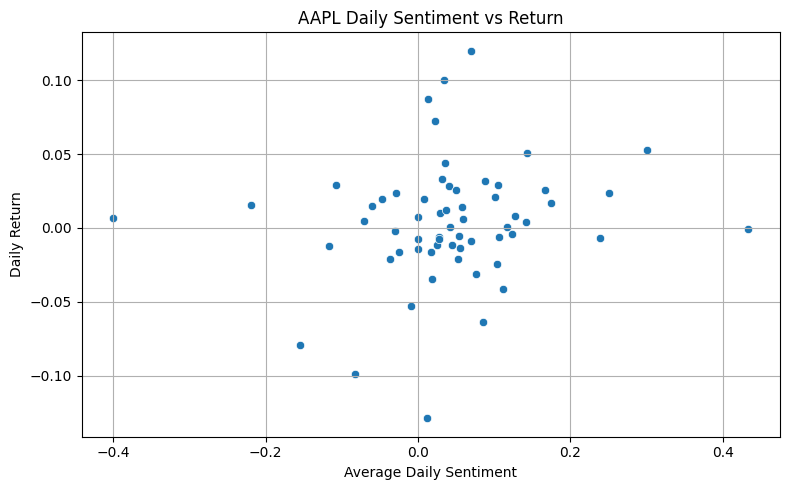


📈 TSLA Analysis
Correlation between Sentiment and Return: 0.0827
P-value: 2.1153e-01 (Significant if < 0.05)


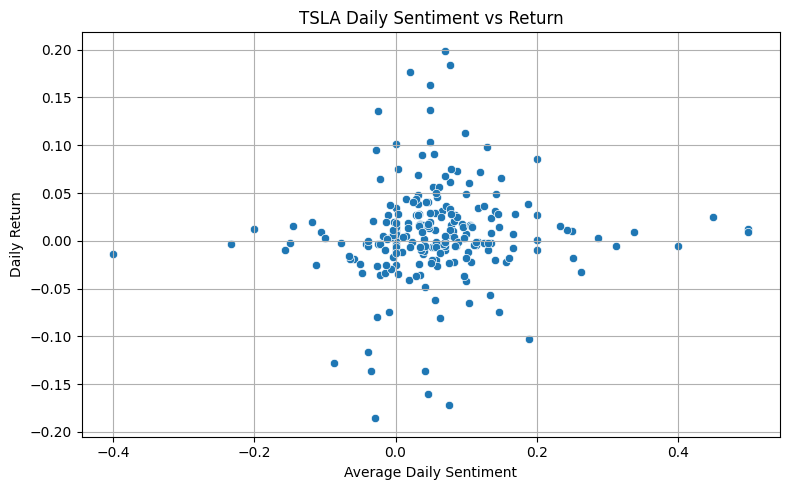


📈 NVDA Analysis
Correlation between Sentiment and Return: 0.1035
P-value: 5.0881e-04 (Significant if < 0.05)


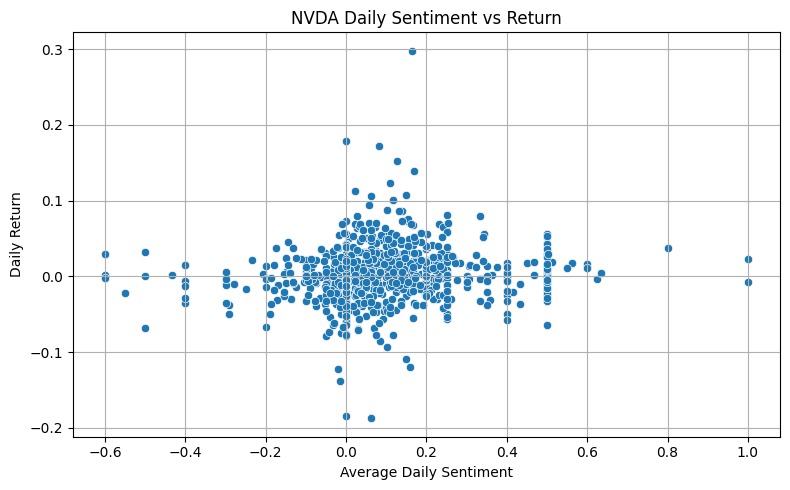

No news data available for MSFT. Skipping analysis.
No news data available for META. Skipping analysis.

📈 GOOG Analysis
Correlation between Sentiment and Return: 0.0568
P-value: 2.8774e-01 (Significant if < 0.05)


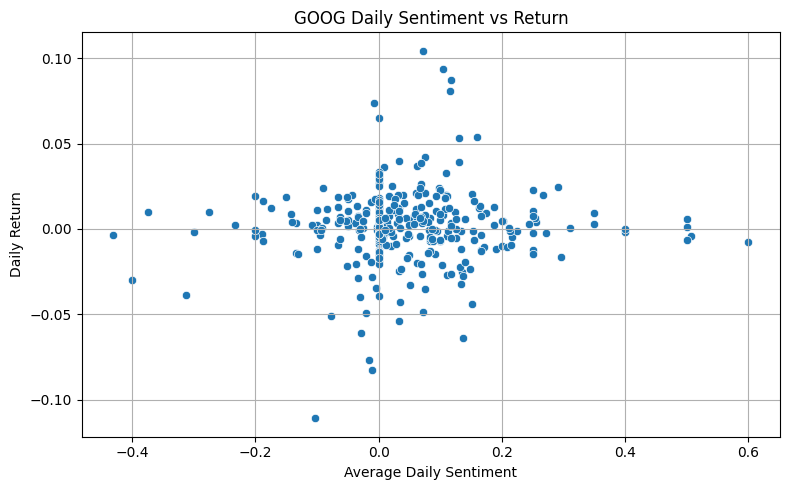


📈 AMZN Analysis
Correlation between Sentiment and Return: -0.0297
P-value: 8.8055e-01 (Significant if < 0.05)


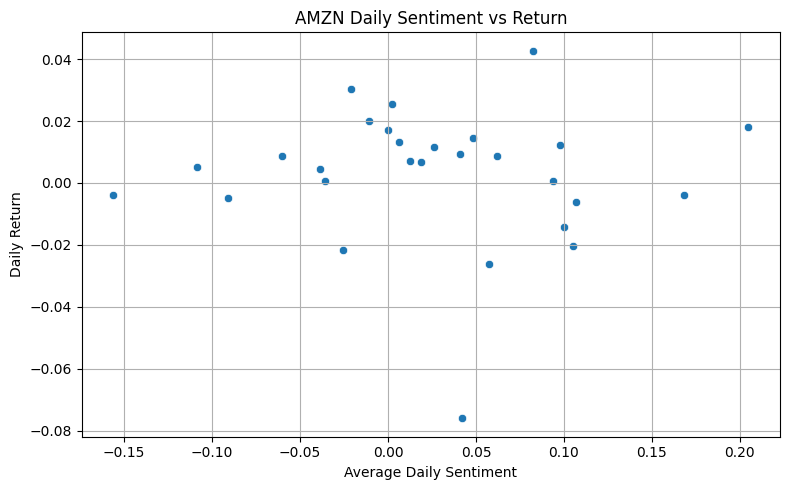

In [8]:
import os
import pandas as pd
from textblob import TextBlob
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import nltk

nltk.download('punkt')

# Stock file paths
stock_files = {
    "AAPL": r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\yfinance_data\yfinance_data\AAPL_historical_data.csv",
    "TSLA": r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\yfinance_data\yfinance_data\TSLA_historical_data.csv",
    "NVDA": r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\yfinance_data\yfinance_data\NVDA_historical_data.csv",
    "MSFT": r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\yfinance_data\yfinance_data\MSFT_historical_data.csv",
    "META": r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\yfinance_data\yfinance_data\META_historical_data.csv",
    "GOOG": r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\yfinance_data\yfinance_data\GOOG_historical_data.csv",
    "AMZN": r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\yfinance_data\yfinance_data\AMZN_historical_data.csv"
}

news_folder = r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\raw_analyst_ratings"

# Functions
def load_stock_data(filepath):
    df = pd.read_csv(filepath)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df[['Date', 'Adj Close']].rename(columns={'Adj Close': 'Close'})
    df.dropna(subset=['Date', 'Close'], inplace=True)
    df.set_index('Date', inplace=True)
    df['Return'] = df['Close'].pct_change()
    return df.dropna()

def parse_date_safe(date_str):
    try:
        return parser.parse(str(date_str)).date()
    except Exception:
        return pd.NaT

def load_news_data(folder_path, target_stock):
    all_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    news_df_list = []
    for file in all_files:
        full_path = os.path.join(folder_path, file)
        try:
            df = pd.read_csv(full_path)
        except Exception:
            continue
        if not {'headline', 'date', 'stock'}.issubset(df.columns):
            continue
        df = df[df['stock'].str.upper() == target_stock.upper()]
        df['date'] = df['date'].apply(parse_date_safe)
        df = df[['date', 'headline']].dropna()
        news_df_list.append(df)
    if news_df_list:
        return pd.concat(news_df_list, ignore_index=True)
    return pd.DataFrame(columns=['date', 'headline'])

def compute_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

def compute_daily_sentiment(news_df):
    news_df['sentiment'] = news_df['headline'].apply(compute_sentiment)
    return news_df.groupby('date')['sentiment'].mean().rename("daily_sentiment")

def analyze_correlation(stock_df, sentiment_series, stock_symbol):
    sentiment_df = sentiment_series.to_frame()
    sentiment_df.index = pd.to_datetime(sentiment_df.index)
    combined_df = stock_df.merge(sentiment_df, left_index=True, right_index=True, how='inner')
    corr, pval = pearsonr(combined_df['Return'], combined_df['daily_sentiment'])
    print(f"\n📈 {stock_symbol} Analysis")
    print(f"Correlation between Sentiment and Return: {corr:.4f}")
    print(f"P-value: {pval:.4e} (Significant if < 0.05)")

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='daily_sentiment', y='Return', data=combined_df)
    plt.title(f'{stock_symbol} Daily Sentiment vs Return')
    plt.xlabel('Average Daily Sentiment')
    plt.ylabel('Daily Return')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main loop
for stock, path in stock_files.items():
    try:
        stock_df = load_stock_data(path)
        news_df = load_news_data(news_folder, stock)
        if not news_df.empty:
            daily_sentiment = compute_daily_sentiment(news_df)
            analyze_correlation(stock_df, daily_sentiment, stock)
        else:
            print(f"No news data available for {stock}. Skipping analysis.")
    except Exception as e:
        print(f"Error processing {stock}: {e}")
